# Задание 1

In [5]:
# %load Classes
from numpy import *
import matplotlib.pyplot as pl
class Hopfield:
    """Сеть Хопфилда"""
    def __init__(self,input):
        self.input=input
        self.Weight=self.__GetWeigtMatrix(input)    

    def __GetWeigtMatrix(cls,train):
        '''Получение матрицы весов'''
        W=zeros((len(train[0]),len(train[0])))
        for tr in train:
            V2=matrix(tr)
            V1=transpose(V2)
            W+=dot(V1,V2)
        W-=diag(diag(W))
        return W   

    def Compute(self,check):
        '''Получить класс'''
        y=transpose(matrix(check))
        y1=sign(dot(self.Weight,y))
        y2=sign(dot(self.Weight,y1))
        while not(y1==y2).all():
            y1=y2
            y2=sign(dot(self.Weight,y1))
        return y2

In [6]:
class Associative:
   def __init__(self,input):
       self.input=input
       self.Weight=self.GetWeight(input)

   def GetWeight(self,input):
       l=list(input.values())[0]
       k=list(input.keys())[0]
       W=zeros((len(l),len(k)))
       for item in input:
           m=matrix(input[item])
           W+=dot(transpose(m),matrix(item))
       return W

   def Compute(self,check):
       x1=sign(dot(check,self.Weight))
       y1=sign(dot(x1,transpose(self.Weight)))
       x2=sign(dot(y1,self.Weight))
       y2=sign(dot(x2,transpose(self.Weight)))
       while not (x1==x2).all() and not (y1==y2).all():
           x1,y1=x2,y2
           x2=sign(dot(y1,self.Weight))
           y2=sign(dot(x2,transpose(self.Weight)))
       return (x2,y2)


def MultiplicativeNoise(dict):
    noize=tuple(i if i==1 else -1 for i in random.randint(0,2,len(dict)))
    return array(noize)*array(dict)


def AdditiveNoize(dict):
    noize=tuple(i if i==1 else -1 for i in random.randint(0,2,len(dict)))
    return array([-1 if i==-2 else 1 for i in array(noize)+array(dict)])

def Generate(train,NoizeFunct,count):
    source=[]
    check=[]
    keys=list(train.keys())
    for i in range(count):
        key=keys[random.randint(0,len(train)-1 if len(train)>1 else len(train))]
        source.append(key)
        check.append(NoizeFunct(train[key]))
    return (source,check)

In [7]:
# %load Lab5.py
from Classes import *
import matplotlib.pyplot as pl
import numpy as np

### Lab5 №1

In [8]:
train=(
       (-1,-1,-1,-1,-1,1,
        -1,-1,-1,-1,1,-1,
        -1,-1,-1,1,-1,-1,
        -1,-1,1,-1,-1,-1,
        -1,1,-1,-1,-1,-1,
        1,-1,-1,-1,-1,-1),
    
       (-1,-1,-1,-1,-1,-1,
        -1,-1,-1,-1,-1,-1,
        -1,-1,-1,-1,-1,-1,
        1,1,1,-1,-1,-1,
        1,1,1,-1,-1,-1,
        1,1,1,-1,-1,-1),
        
        (-1,-1,-1,1,1,1,
         -1,-1,-1,1,1,1,
         -1,-1,-1,1,1,1,
         -1,-1,-1,-1,-1,-1,
         -1,-1,-1,-1,-1,-1,
         -1,-1,-1,-1,-1,-1),
         
        (-1,-1,-1,-1,-1,-1,
         -1,-1,1,1,-1,-1,
         -1,1,-1,-1,1,-1,
         1,-1,-1,-1,-1,1,
         -1,-1,-1,-1,-1,-1,
         -1,-1,-1,-1,-1,-1)
       )

check=(
        (-1,-1,1,1,1,1,
         -1,-1,-1,-1,1,1,
         1,-1,-1,1,1,-1,
         -1,-1,-1,-1,-1,-1,
         -1,1,-1,-1,1,-1,
         1,1,-1,-1,-1,1),

        (-1,-1,-1,-1,-1,1,
         -1,-1,-1,1,1,-1,
         -1,-1,-1,1,-1,1,
         -1,-1,1,-1,-1,-1,
         -1,-1,-1,-1,-1,-1,
         -1,-1,-1,-1,-1,-1),

        (-1,-1,-1,-1,-1,1,
         -1,-1,-1,-1,1,-1,
         -1,-1,-1,1,1,-1,
         -1,-1,-1,-1,-1,-1,
         -1,1,-1,-1,-1,-1,
         1,-1,-1,-1,-1,-1),

        (-1,-1,-1,-1,-1,1,
         -1,-1,-1,-1,1,-1,
         -1,-1,-1,1,-1,-1,
         -1,-1,1,-1,-1,-1,
         -1,1,-1,-1,-1,-1,
         1,-1,-1,-1,-1,-1),

        (-1,-1,-1,-1,1,-1,
         -1,1,-1,-1,-1,-1,
         -1,-1,-1,-1,-1,1,
         1,1,1,-1,-1,-1,
         1,-1,1,1,-1,-1,
         1,-1,1,-1,-1,1),

        (-1,-1,-1,-1,-1,-1,
         -1,-1,-1,-1,-1,-1,
         -1,-1,-1,-1,-1,-1,
         1,1,1,-1,-1,-1,
         1,1,1,-1,-1,-1,
         1,1,1,-1,-1,-1)
    )

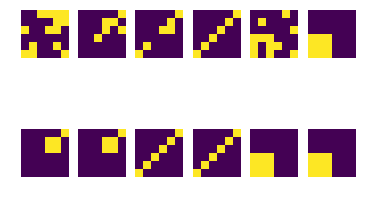

In [9]:
def main():    
    net=Hopfield(train)
    fig,axs=pl.subplots(2,6)
    for i in range(6):
        axs[0,i].imshow(np.array(check[i]).reshape(6,6))
        axs[1,i].imshow(net.Compute(check[i]).reshape(6,6))
        axs[0,i].axis('off')    
        axs[1,i].axis('off')        
    pl.show()
   
if __name__=="__main__":
    main()

## Использование neupy

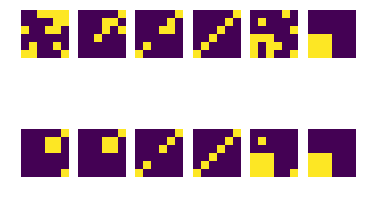

In [11]:
from neupy import algorithms
import matplotlib.pyplot as pl
import numpy as np
import Lab5 as lab5

dhnet = algorithms.DiscreteHopfieldNetwork(mode='async')
t=np.matrix([[1 if j==1 else 0 for j in i] for i in lab5.train])

dhnet.train(t)
test=(np.matrix(lab5.check[5]).ravel()+1)/2
res=dhnet.predict(test)
fig,axs=pl.subplots(2,6)
for i in range(6):
    test=(np.matrix(lab5.check[i]).ravel()+1)/2
    res=dhnet.predict(test)
    axs[0,i].imshow(test.reshape(6,6))
    axs[1,i].imshow(res.reshape(6,6))
    axs[0,i].axis('off')
    axs[1,i].axis('off')

Задание 2
=========

Ассоциативная сеть
-----

In [14]:
import random

In [15]:
train={
   (-1,-1,-1,1):
   (
   -1,-1,-1,-1,-1,-1,-1,
   -1,-1,-1,1,-1,-1,-1,
   -1,-1,1,1,-1,-1,-1,
   -1,-1,-1,1,-1,-1,-1,
   -1,-1,-1,1,-1,-1,-1,
   -1,-1,-1,1,-1,-1,-1,
   -1,-1,-1,1,-1,-1,-1,
   -1,1,1,1,1,1,-1,
   -1,-1,-1,-1,-1,-1,-1
   ),
    (-1,-1,1,-1):
   (
       -1,-1,-1,-1,-1,-1,-1,
       -1,1,1,1,1,1,-1,
       -1,-1,-1,-1,-1,1,-1,
       -1,-1,-1,-1,-1,1,-1,
       -1,1,1,1,1,1,-1,
       -1,1,-1,-1,-1,-1,-1,
       -1,1,-1,-1,-1,-1,-1,
       -1,1,1,1,1,1,-1,
       -1,-1,-1,-1,-1,-1,-1,
   ),
   (-1,-1,1,1):
   (
       -1,-1,-1,-1,-1,-1,-1,
       -1,1,1,1,1,1,-1,
       -1,-1,-1,-1,-1,1,-1,
       -1,-1,-1,-1,-1,1,-1,
       -1,-1,-1,1,1,1,-1,
       -1,-1,-1,-1,-1,1,-1,
       -1,-1,-1,-1,-1,1,-1,
       -1,1,1,1,1,1,-1,
       -1,-1,-1,-1,-1,-1,-1
   ),
   (-1,1,-1,-1):
   (
      -1,1,-1,-1,-1,1,-1,
      -1,1,-1,-1,-1,1,-1,
      -1,1,-1,-1,-1,1,-1,
      -1,1,-1,-1,-1,1,-1,
      -1,1,1,1,1,1,-1,
      -1,-1,-1,-1,-1,1,-1,
      -1,-1,-1,-1,-1,1,-1,
      -1,-1,-1,-1,-1,1,-1,
      -1,-1,-1,-1,-1,1,-1
   )
   }
check=((
   (-1,1,-1,-1,-1,-1,-1),
   (-1,-1,-1,1,-1,-1,-1),
   (-1,-1,1,1,-1,1,-1),
   (-1,-1,1,1,-1,-1,-1),
   (-1,1,-1,1,-1,-1,-1),
   (-1,-1,-1,1,-1,1,-1),
   (-1,-1,-1,1,-1,-1,-1),
   (-1,1,1,1,1,1,-1),
   (-1,-1,-1,1,-1,1,-1)
   ),
   (
       (-1,-1,1,-1,-1,1,-1),
       (-1,1,1,1,1,1,-1),
       (-1,-1,1,-1,-1,1,-1),
       (-1,1,-1,-1,-1,1,-1),
       (-1,1,1,1,1,1,-1),
       (1,1,-1,1,-1,-1,-1),
       (-1,1,-1,-1,-1,-1,-1),
       (-1,1,1,1,1,1,-1),
       (-1,-1,-1,-1,1,-1,-1),
   ),
   (
       (-1,-1,-1,-1,-1,-1,-1),
       (-1,1,1,1,1,-1,-1),
       (-1,-1,-1,-1,-1,1,-1),
       (1,-1,-1,-1,-1,1,-1),
       (-1,-1,-1,1,-1,1,-1),
       (-1,-1,-1,-1,-1,1,-1),
       (1,-1,-1,-1,-1,1,-1),
       (-1,1,1,-1,1,1,-1),
       (-1,-1,-1,-1,-1,-1,-1)
   ),
    (
       (-1,-1,-1,-1,-1,-1,-1),
       (-1,-1,-1,1,-1,1,-1),
       (-1,-1,1,1,-1,-1,-1),
       (-1,-1,-1,-1,-1,-1,-1),
       (-1,1,-1,1,-1,-1,-1),
       (-1,-1,-1,1,-1,-1,-1),
       (-1,1,-1,-1,-1,-1,-1),
       (-1,1,1,1,1,1,-1),
       (-1,1,-1,-1,-1,-1,-1)
       ),
   (
       (-1,-1,1,-1,-1,-1,-1),
       (-1,1,1,1,1,1,-1),
       (1,-1,1,-1,-1,1,-1),
       (-1,-1,-1,-1,-1,1,-1),
       (1,1,-1,1,1,-1,-1),
       (-1,1,-1,-1,1,-1,-1),
       (-1,1,-1,1,-1,-1,-1),
       (-1,1,1,-1,1,1,-1),
       (-1,-1,-1,-1,-1,-1,-1),
   ),
   (
       (-1,-1,-1,-1,-1,-1,-1),
       (-1,1,1,-1,1,1,-1),
       (-1,-1,1,-1,-1,1,-1),
       (1,-1,-1,-1,-1,-1,-1),
       (-1,-1,-1,-1,1,1,-1),
       (-1,-1,1,-1,-1,1,-1),
       (-1,-1,-1,1,-1,1,1),
       (-1,1,1,-1,1,1,-1),
       (-1,1,-1,-1,-1,-1,-1)
   )
   )
test={
     (-1,-1,1):
     (
       -1,1,-1,
       1,1,-1,
       -1,1,-1,
       -1,1,-1,
       1,1,1
         ),
     (-1,1,-1):
     (
       1,1,1,
       -1,-1,1,
       1,1,1,
       1,-1,-1,
       1,1,1,
         ),   
     (-1,1,1):
     (
       1,1,1,
       -1,-1,1,
       1,1,1,
       -1,-1,1,
       1,1,1,
         )
    }

testcheck=(
     (
       (-1,1,-1),
       (1,1,-1),
       (-1,-1,-1),
       (-1,1,-1),
       (1,1,1),
         ),
     (
       (1,1,1),
       (-1,-1,1),
       (1,-1,1),
       (1,-1,-1),
       (1,-1,1),
         ),   

     (
       (1,1,-1),
       (1,-1,1),
       (1,1,1),
       (-1,-1,1),
       (1,1,1),
         )
    )

Additive:49.70% Multiplicative:16.90% WithoutNoize:74.50%
 {(-1, -1, -1, 1): 247, (-1, -1, 1, -1): 250, (-1, -1, 1, 1): 248}


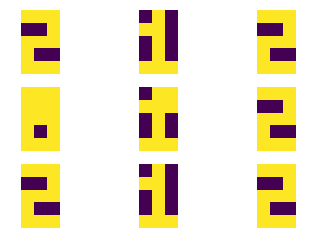

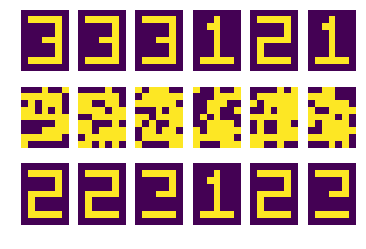

In [20]:
def main(): 
    ass=Associative(test)
    fig,axs=pl.subplots(3,3) 
    source,check=Generate(test,AdditiveNoize,3)
    for i in range(3):
        axs[0,i].imshow(np.array(test[source[i]]).reshape(5,3))
        axs[1,i].imshow(check[i].reshape(5,3))
        res,img=ass.Compute(check[i])
        axs[2,i].imshow(img.reshape(5,3))
        axs[0,i].axis('off')        
        axs[1,i].axis('off')
        axs[2,i].axis('off')


    ass1=Associative(train)
    fig1,axes=pl.subplots(3,6) 
    source,check=Generate(train,AdditiveNoize,6)
    for i in range(6):
        axes[0,i].imshow(np.array(train[source[i]]).reshape(9,7))
        axes[1,i].imshow(check[i].reshape(9,7))
        res,img=ass1.Compute(check[i])
        axes[2,i].imshow(img.reshape(9,7))
        axes[0,i].axis('off')        
        axes[1,i].axis('off')
        axes[2,i].axis('off')


    sourceA,checkA=Generate(train,AdditiveNoize,1000)
    sourceM,checkM=Generate(train,MultiplicativeNoise,1000)
    clear=list(train.items())*333+list(random.choice(list(train.items())))
    random.shuffle(clear)

    rA=0
    rM=0
    r=0
    resdict={}
    for i in range(1000):
        resA,imgA=ass1.Compute(checkA[i])
        resM,imgM=ass1.Compute(checkM[i])
        resC,imgR=ass1.Compute(np.array(clear[i][1]))
        if (sourceA[i]==resA).all():
            rA+=1
        if (sourceM[i]==resM).all():
            rM+=1
        if (clear[i][0]==resC).all():
            r+=1
            try:
                resdict[clear[i][0]]+=1
            except KeyError:
                resdict[clear[i][0]]=1            
    print("Additive:{0:.2%} Multiplicative:{1:.2%} WithoutNoize:{2:.2%}\n {3}".format(rA/1000,rM/1000,r/1000,resdict))
    pl.axis('off')
    pl.show()




if __name__=="__main__":
    main()

## Использование neupy

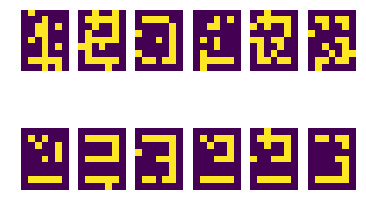

In [16]:
from neupy import algorithms
import matplotlib.pyplot as pl
import numpy as np
import Lab5_1 as lab5

dhnet = algorithms.DiscreteHopfieldNetwork(mode='async')
t=np.matrix([[1 if j==1 else 0 for j in i] for i in lab5.train.values()])

dhnet.train(t)
test=(np.matrix(lab5.check[5]).ravel()+1)/2
res=dhnet.predict(test)
fig,axs=pl.subplots(2,6)
for i in range(6):
    test=(np.matrix(lab5.check[i]).ravel()+1)/2
    res=dhnet.predict(test)
    axs[0,i].imshow(test.reshape(9,7))
    axs[1,i].imshow(res.reshape(9,7))
    axs[0,i].axis('off')
    axs[1,i].axis('off')



# Задание 3

### Lab5_2.py

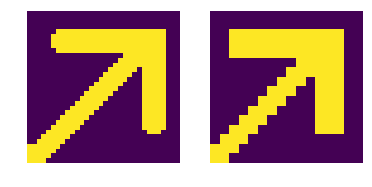

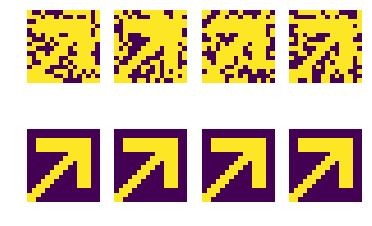

In [22]:
import imageio


def main():
    arrow=imageio.imread("arrow.bmp")
    prarrow=imageio.imread("pressed_arrow.bmp")
    input={tuple(1 if i>0 else -1 for i in arrow.ravel()):tuple(1 if i>0 else -1 for i in prarrow.ravel())}
    ass=Associative(input)
    fig1,axes=pl.subplots(1,2) 
    res,img=ass.Compute(np.array(list(input.values())[0]))
    axes[0].imshow(res.reshape(32,32))
    axes[1].imshow(img.reshape(16,16))
    axes[0].axis('off')        
    axes[1].axis('off')     

    src,check=Generate(input,AdditiveNoize,4)
    fig,axes=pl.subplots(2,4) 
    for i in range(4):
        axes[0,i].imshow(check[i].reshape(16,16))
        axes[1,i].imshow(ass.Compute(check[i])[1].reshape(16,16))
        axes[0,i].axis('off')        
        axes[1,i].axis('off')
    pl.show()


if __name__=="__main__":
    main()